In [1]:
%run matplotlib_setup.ipy
%run helper.ipy
from types import SimpleNamespace

from ipywidgets import interact
import matplotlib
from matplotlib import pyplot
from mpl_toolkits import mplot3d
import numpy as np
import scipy.linalg as la 
from Zak_compute import zak_bands

import kwant
from kwant.wraparound import wraparound, plot_2d_bands

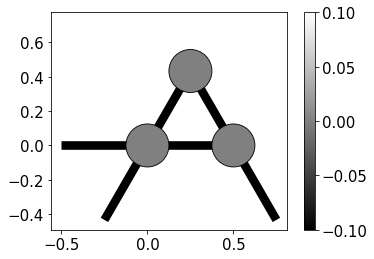

[PointGroupElement(
 [[1 0]
  [0 1]],
 False,
 False,
 [[ 1.00000000e+00+1.91710082e-48j  4.38010185e-16+1.36845553e-48j
    2.13929808e-18-1.71056941e-48j]
  [ 3.31174889e-16+1.36845553e-48j  1.00000000e+00-2.73691106e-48j
   -4.92838815e-16+1.02634165e-48j]
  [ 1.90156971e-16-1.83886212e-48j -6.60938797e-16-1.02634165e-48j
    1.00000000e+00+6.84227766e-49j]],
 ), PointGroupElement(
 [[1 0]
  [0 1]],
 True,
 False,
 [[-1.00000000e+00+0.00000000e+00j -2.19005093e-16-4.81261201e-33j
   -1.06964904e-18+7.82042436e-34j]
  [-1.65587445e-16+5.45327041e-33j -1.00000000e+00+1.50927256e-33j
    2.46419408e-16-8.47880706e-34j]
  [-9.50784853e-17+2.37569852e-34j  3.30469398e-16+1.67801605e-33j
   -1.00000000e+00-1.50927256e-33j]],
 )]

In [14]:
kag_lat = kwant.lattice.kagome(norbs=1)
kagome = kwant.Builder(kwant.TranslationalSymmetry(*kag_lat.prim_vecs))
kagome[kag_lat.shape((lambda pos: True), (0, 0))] = 0
kagome[kag_lat.neighbors(1)] = 1
kwant.plot(kagome,site_color=family_color,site_lw=0.01)
#kagome = wraparound(kagome).finalized()
#dispersion_2D(kag_lat,kagome)
import kwant.qsymm 
kwant.qsymm.find_builder_symmetries(kagome)

In [3]:
n_basis = len(kagome.sites)
a1,a2 = kag_lat.prim_vecs
act_pos = np.array([kagome.pos(i) for i in range(n_basis)])
red_pos = np.matmul(act_pos,la.inv([a1,a2]))
h = kagome.hamiltonian_submatrix

In [5]:
import z2pack
from Z2_compute import zak_bands as zak_bands_z2

#ham_k=zak_bands_z2(kagome,momenta=1001,dim=2)
z2_system = z2pack.hm.System(h,dim=2,pos=red_pos,
                                 convention=1)

result = z2pack.surface.run(system=z2_system, 
                            surface=lambda t1,t2: [t1,t2],
                            pos_tol=1e-4,
                            iterator=range(2,500,2));

print("Z2invariant:",z2pack.invariant.z2(result))
print("Chern number:",z2pack.invariant.z2(result))


+----------------------------------------------------------------------+
|     ===================                                              |
|     SURFACE CALCULATION                                              |
|     ===================                                              |
|     starting at 2019-03-18 18:26:22,478                              |
|     running Z2Pack version 2.1.1                                     |
|                                                                      |
|     gap_tol:            0.3                                          |
|     init_result:        None                                         |
|     iterator:           range(2, 500, 2)                             |
|     load:               False                                        |
|     load_quiet:         True                                         |
|     min_neighbour_dist: 0.01                                         |
|     move_tol:           0.3                     

/Users/ssrinivasan/.local/lib/python3.6/site-packages/z2pack/hm.py:58: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
  size = len(self._hamilton([0] * dim))  # assuming to be square...
/Users/ssrinivasan/.local/lib/python3.6/site-packages/z2pack/hm.py:92: KwantDeprecationWarning: The 'args' parameter has been deprecated since version 1.4 -- Instead, provide named parameters as a dictionary via 'params'.
  ham = self._hamilton(k)


INFO:       Calculating line for N = 10
INFO: Adding line at t = 0.5
INFO:       Calculating line for N = 2
INFO:       Calculating line for N = 4
INFO:       Calculating line for N = 6
INFO:       Calculating line for N = 8
INFO:       Calculating line for N = 10
INFO:       Calculating line for N = 12
INFO:       Calculating line for N = 14
INFO:       Calculating line for N = 16
INFO:       Calculating line for N = 18
INFO: Adding line at t = 0.6000000000000001
INFO:       Calculating line for N = 2
INFO:       Calculating line for N = 4
INFO:       Calculating line for N = 6
INFO:       Calculating line for N = 8
INFO:       Calculating line for N = 10
INFO:       Calculating line for N = 12
INFO:       Calculating line for N = 14
INFO:       Calculating line for N = 16
INFO:       Calculating line for N = 18
INFO:       Calculating line for N = 20
INFO:       Calculating line for N = 22
INFO: Adding line at t = 0.7000000000000001
INFO:       Calculating line for N = 2
INFO:       

In [ ]:
z2_system = z2pack.hm.System(h,dim=2,pos=red_pos,bands=3,
                                 convention=2)

result_line = z2pack.line.run(system=z2_system, 
                        line=lambda t1: [t1,0],
                        pos_tol=1e-4,
                        iterator=range(200,500,2));

print("WCC: \n",result_line.wcc)
print("Polarization: \n",result_line.pol)

TypeError: 'tuple' object is not callable

In [ ]:
isinstance(np.array([0,0]),np.ndarray)